<a href="https://colab.research.google.com/github/lisosoma/BI_STATISTICS/blob/main/bi_hw2_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import scipy.stats as sts
import scipy
import seaborn as sns
import scipy.optimize as opt
from scipy.optimize import fmin
import seaborn as sns

### Задача 1 

In [ ]:
n = np.array([100, 500, 1000, 5000, 10000, 50000, 100000, 500000, 1000000, 5000000, 10000000, 50000000, 100000000])

- (а) $\int^2_0x^3 − 2x^2 + 4x − 3 dx = \frac{2}{3}$.

Возьмем в качестве случайной величины равномерно распределенную случайную величину на $[0, 2]$ и случайную величину распределенную по закону бета распределения на $[0, 2]$ (добьемся этого с помощью параметра масштабирования). Объемы выборки будем брать $100, 500, 1000, 5000, 10000, 50000, 100000, 500000, 1000000, 5000000, 10000000, 50000000, 100000000$.

In [ ]:
samples = np.array([sts.uniform.rvs(loc = 0, scale = 2, size = k) for k in n])

In [ ]:
f = lambda x: x**3 - 2*x**2 + 4*x - 3
integrals = []
for sample, k in zip(samples, n):
    integrals.append(2 * np.sum(f(sample)) / k)

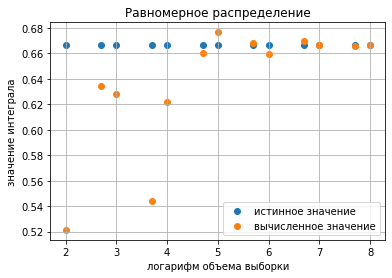

In [ ]:
plt.xlabel('логарифм объема выборки')
plt.ylabel('значение интеграла')
plt.title('Равномерное распределение')
plt.scatter(np.log10(n), [2/3] * len(n), label = 'истинное значение')
plt.scatter(np.log10(n), integrals, label = 'вычисленное значение')
plt.grid()
plt.legend()
plt.show()

In [ ]:
samplesBeta = np.array([sts.beta.rvs(a = 2, b = 2, loc=0, scale=2, size=k, random_state=None) for k in n])

In [ ]:
f = lambda x: 8 * (x**3 - 2*x**2 + 4*x - 3) / x / (2 - x) * scipy.special.beta(2, 2)
integralsBeta = []
for sample, k in zip(samplesBeta, n):
    integralsBeta.append(np.sum(f(sample)) / k)

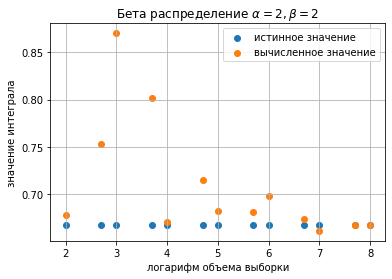

In [ ]:
plt.xlabel('логарифм объема выборки')
plt.ylabel('значение интеграла')
plt.title(fr'Бета распределение $\alpha = 2, \beta = 2$')
plt.scatter(np.log10(n), [2/3] * len(n), label = 'истинное значение')
plt.scatter(np.log10(n), integralsBeta, label = 'вычисленное значение')
plt.grid()
plt.legend()
plt.show()

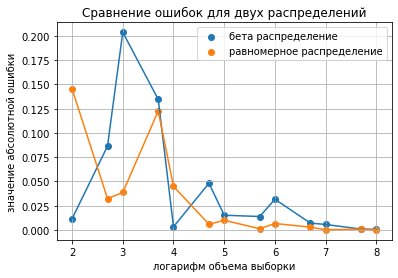

In [ ]:
errors1 = abs(np.array(integrals) - 2/3)
errors2 = abs(np.array(integralsBeta) - 2/3)
plt.xlabel('логарифм объема выборки')
plt.ylabel('значение абсолютной ошибки')
plt.title(fr'Сравнение ошибок для двух распределений')
plt.scatter(np.log10(n), errors2, label = 'бета распределение')
plt.plot(np.log10(n), errors2)
plt.scatter(np.log10(n), errors1, label = 'равномерное распределение')
plt.plot(np.log10(n), errors1)
plt.grid()
plt.legend()
plt.show()

- (b) $\int^∞_{−∞}\frac{x}{12} · e^{\frac{−x^2}{24} | \sin(x^2)|}dx = 0$ (в силу симметрии).

Объемы выборок будем брать те же самые, при этом в качестве распределения возьмем нормальное и будем менять его дисперсию $\sigma = \{0.1, 1, 10\}$.

In [ ]:
samplesNorm = np.array([sts.norm.rvs( loc=0, scale=1, size=k, random_state=None) for k in n])

In [ ]:
f = lambda x: np.sqrt(2 * np.pi) * x / 12 * np.exp(-x**2 / 24 * abs(np.sin(x**2)) ) * np.exp(-x**2 / 2)
integralsNorm = []
for sample, k in zip(samplesNorm, n):
    integralsNorm.append(np.sum(f(sample)) / k)

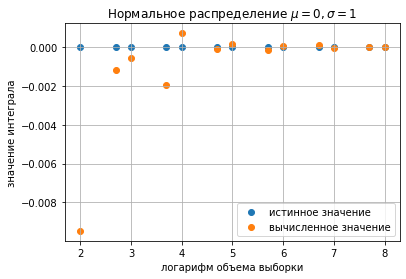

In [ ]:
plt.xlabel('логарифм объема выборки')
plt.ylabel('значение интеграла')
plt.title(fr'Нормальное распределение $\mu = 0, \sigma = 1$')
plt.scatter(np.log10(n), [0] * len(n), label = 'истинное значение')
plt.scatter(np.log10(n), integralsNorm, label = 'вычисленное значение')
plt.grid()
plt.legend()
plt.show()

In [ ]:
samplesNorm2 = np.array([sts.norm.rvs( loc=0, scale=10, size=k, random_state=None) for k in n])
f = lambda x: 10 * np.sqrt(2 * np.pi) * x / 12 * np.exp(-x**2 / 24 * abs(np.sin(x**2)) ) * np.exp(-x**2 / 200)
integralsNorm2 = []
for sample, k in zip(samplesNorm2, n):
    integralsNorm2.append(np.sum(f(sample)) / k)

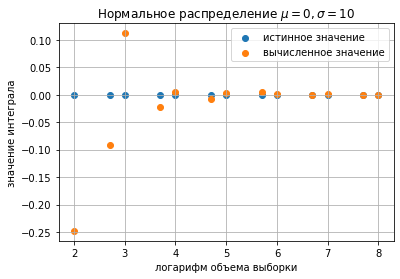

In [ ]:
plt.xlabel('логарифм объема выборки')
plt.ylabel('значение интеграла')
plt.title(fr'Нормальное распределение $\mu = 0, \sigma = 10$')
plt.scatter(np.log10(n), [0] * len(n), label = 'истинное значение')
plt.scatter(np.log10(n), integralsNorm2, label = 'вычисленное значение')
plt.grid()
plt.legend()
plt.show()

In [ ]:
samplesNorm3 = np.array([sts.norm.rvs( loc=0, scale=0.1, size=k, random_state=None) for k in n])
f = lambda x: 0.1 * np.sqrt(2 * np.pi) * x / 12 * np.exp(-x**2 / 24 * abs(np.sin(x**2)) ) * np.exp(-x**2 / 0.02)
integralsNorm3 = []
for sample, k in zip(samplesNorm3, n):
    integralsNorm3.append(np.sum(f(sample)) / k)

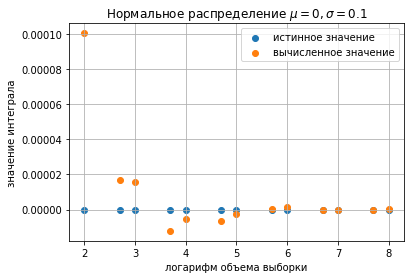

In [ ]:
plt.xlabel('логарифм объема выборки')
plt.ylabel('значение интеграла')
plt.title(fr'Нормальное распределение $\mu = 0, \sigma = 0.1$')
plt.scatter(np.log10(n), [0] * len(n), label = 'истинное значение')
plt.scatter(np.log10(n), integralsNorm3, label = 'вычисленное значение')
plt.grid()
plt.legend()
plt.show()

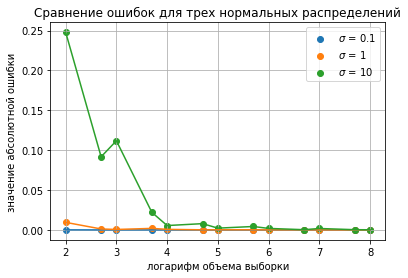

In [ ]:
errors1 = abs(np.array(integralsNorm3) - 0)
errors2 = abs(np.array(integralsNorm) - 0)
errors3 = abs(np.array(integralsNorm2) - 0)
plt.xlabel('логарифм объема выборки')
plt.ylabel('значение абсолютной ошибки')
plt.title(fr'Сравнение ошибок для трех нормальных распределений')
plt.scatter(np.log10(n), errors1, label = rf'$\sigma$ = 0.1')
plt.plot(np.log10(n), errors1)
plt.scatter(np.log10(n), errors2, label = rf'$\sigma$ = 1')
plt.plot(np.log10(n), errors2)
plt.scatter(np.log10(n), errors3, label = rf'$\sigma$ = 10')
plt.plot(np.log10(n), errors3)
plt.grid()
plt.legend()
plt.show()

- (c)

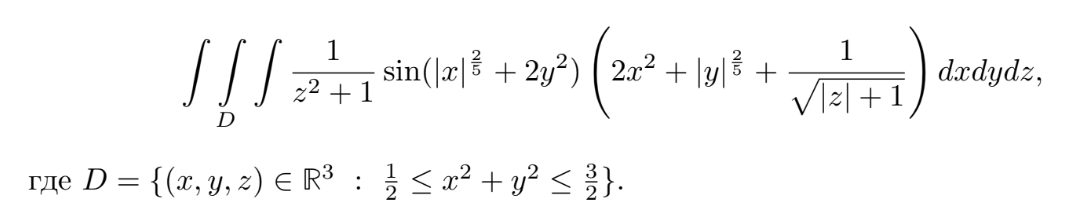

В качестве распределения будем брать равномерное распределение в полом шаре с внутренним радиусом $0.5$ и внешним радиусом $1.5$. Объемы выборок -- те же самые.

In [ ]:
f = lambda x, y, z : 1 / (z ** 2 + 1) * np.sin(abs(x) ** (2 / 5) + 2 * y ** 2) * (2 * x **2 + abs(y) ** (2 / 5) + 1 / np.sqrt(abs(z) + 1))

In [ ]:
def generate():
    while True:
        x = sts.uniform.rvs(-3/2, 3)
        y = sts.uniform.rvs(-3/2, 3)
        if 1/2 <= x ** 2 + y ** 2 <= 3/2:
            return(x, y)

In [ ]:
a = np.array([generate() for i in range(1000)]).T

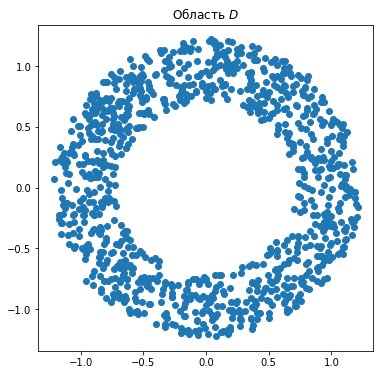

In [ ]:
fig = plt.figure(figsize = (6, 6))
plt.title(fr'Область $D$')
plt.scatter(a[0], a[1])
plt.show()

In [ ]:
from tqdm import tqdm

mu = (3 / 2 - 1 / 2) ** 3 # среднее значение по области
integrals3D = []
for k in tqdm(n[:8]):
    a = np.array([generate() for i in range(k)]).T
    x = a[0]
    y = a[1]
    z = a[0] ** 2 + a[1] ** 2
    integrals3D.append(np.mean(mu * f(x, y, z)))

100%|██████████| 8/8 [03:35<00:00, 26.90s/it]


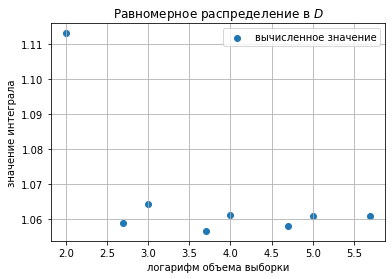

In [ ]:
plt.xlabel('логарифм объема выборки')
plt.ylabel('значение интеграла')
plt.title(fr'Равномерное распределение в $D$')
plt.scatter(np.log10(n[:8]), integrals3D, label = 'вычисленное значение')
plt.grid()
plt.legend()
plt.show()

### Задача 2

Посчитаем, чему равно матожидание $b_k(G)$ -- числа различных $k$-клик в графе $G$. Пусть $V$ -- множество ребер графа, тогда $b_k(G)=∑_{T⊆V, |T|=k}\mathbb{I}_{\{T \ является \ k-кликой\}}$. Найдем матожидание $E[b_k(G)] =∑_{T⊆V,|T|=k}E\mathbb{I}_{\{T \ является \ k-кликой\}}=∑_{T⊆V,|T|=k}P[T \ является \ k-кликой]$ (по линейности матожидания). Так как вероятность появления ребра для любых двух вершин одинаковая, то $P[T \ является \ k-кликой] = P[выбрать \ 2 \ ребера \ из \ k] (так  \ как \  k-клика \ является \ k-полным \ подграфом \ G) = p^{\binom{k}{2}}$. Тогда $Eb_k(G)=p^{\binom{k}{2}}∑_{T⊆V,|T|=k}\mathbb{I}=\binom{n}{k}⋅p^{\binom{k}{2}}$



In [ ]:
import networkx as nx

class graph:

    def __init__(self, n = 14, p = 0.5):
        '''
        данная функция выполняет генерацию n случайных бернуллиевских
        величин с заданным параметром p, далее эти случайные величины
        используются для генерации матрицы смежности случайного графа
        '''
        self.n = n
        self.p = p
        self.v = sts.bernoulli.rvs(p = p, size = int(n * (n - 1) / 2))
        self.m = np.zeros((n, n))
        self.S = []
        self.m[np.triu_indices(n, 1)] = self.v
        self.m =  self.m + self.m.T


    def set_of_cliques(self):
        '''
        данная функция выполняет генерацию списка с числом
        k-клик для данного случайного графа
        '''
        set_cliques = np.zeros(self.n)
        G = nx.from_numpy_matrix(self.m)
        self.S = [s for s in nx.enumerate_all_cliques(G)]
        for s in self.S:
            set_cliques[len(s) - 1] += 1

        return set_cliques

    
    def X(self):
        '''
        данная функция вычисляет значение X(G)
        '''
        bk = self.set_of_cliques()
        return (np.sum([(-1) ** (i + 2) * bk[i] for i in range(self.n)])) 


    def show_graph_with_labels(self):
        '''
        функция для визуализации графа
        '''
        edges = []
        for i in range(self.n):
            for j in range(i, self.n):
                if self.m[i][j]:
                    edges.append((i, j))
        gr = nx.Graph()
        gr.add_edges_from(edges)
        sub = [gr.subgraph(c) for c in nx.connected_components(gr)]
        for s in sub:
            nx.draw(s, node_size=500, with_labels=True)
            plt.show()

Протестируем класс на небольшом графе.

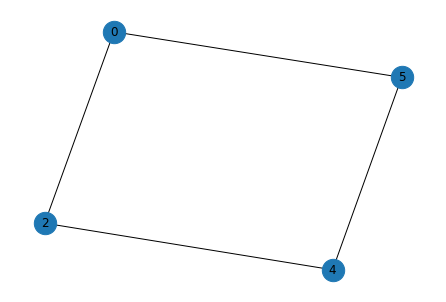

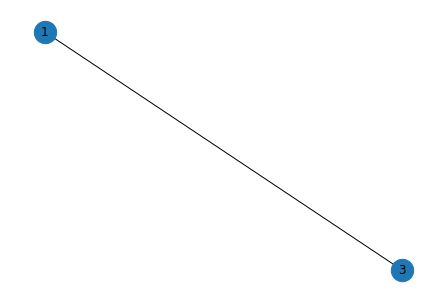

Набор bk(G) [6. 5. 0. 0. 0. 0.]
Функция f(p) = 1.0


In [ ]:
G = graph(6, 0.3)
G.show_graph_with_labels()
print(f'Набор bk(G) {G.set_of_cliques()}')
print(f'Функция f(p) = {G.X()}')

In [ ]:
from tqdm import tqdm

P = np.linspace(0, 1, 10, endpoint = True)
n = 14
N = [100, 1000, 10000]
X = []
for p in tqdm(P):
    for k in N:
          x = np.mean(np.array([graph(n, p).X() for i in range(k)]))
          X.append(x)

100%|██████████| 10/10 [22:57<00:00, 137.74s/it]


In [ ]:
X = np.array(X).reshape(len(P), len(N)).T

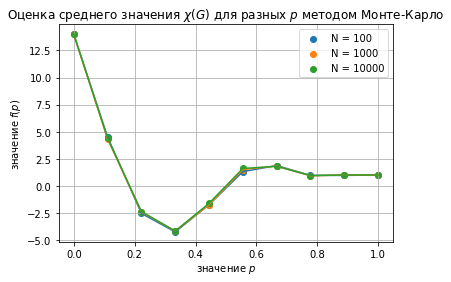

Значения f(p) для разных p
p = 0.0, f(p) = 14.0
p = 0.1, f(p) = 4.4043
p = 0.2, f(p) = -2.3785
p = 0.3, f(p) = -4.1767
p = 0.4, f(p) = -1.6189
p = 0.6, f(p) = 1.602
p = 0.7, f(p) = 1.8011
p = 0.8, f(p) = 0.9417
p = 0.9, f(p) = 1.0029
p = 1.0, f(p) = 1.0


In [ ]:
plt.xlabel(rf'значение $p$')
plt.ylabel(rf'значение $f(p)$')
plt.title(fr'Оценка среднего значения $\chi(G)$ для разных $p$ методом Монте-Карло')
plt.scatter(P, X[0], label = 'N = 100')
plt.plot(P, X[0])
plt.scatter(P, X[1], label = 'N = 1000')
plt.plot(P, X[1])
plt.scatter(P, X[2], label = 'N = 10000')
plt.plot(P, X[2])
plt.grid()
plt.legend()
plt.show()
print(f'Значения f(p) для разных p')
for p, x in zip(P, X[2]):
    print(f'p = {round(p, 1)}, f(p) = {x}')

### Задача 3

В файеле из открытого источника хранятся частоты встречаемости двухбуквенных комбинаций https://docs.google.com/spreadsheets/d/1RRf5NIF1d0k9VonrByQXfUGu3tO41rYFu6gmg75IlSg/edit.

Из открытого источника также известно, что частота пробела равна 0.1446.

In [ ]:
df = pd.read_csv('/content/f.csv')
p = 0.1446 # частота встречаемости пробела в русском языке
space_after_any = np.sum(df['count'].to_numpy()) / (1 - 0.1446) * 0.1446 / 33 

In [ ]:
df

,XY,count
0,ст,7173707
1,то,6718190
2,но,6436135
3,на,5928622
4,по,5212731
...,...,...
689,фн,4365
690,нэ,4347
691,тш,4342
692,фг,4278


In [ ]:
alph = []
for i in range(ord('а'), ord('я')):
    alph.append(chr(i))
alph.insert(6, 'ё')
alph.append('я')
alph.append(' ')

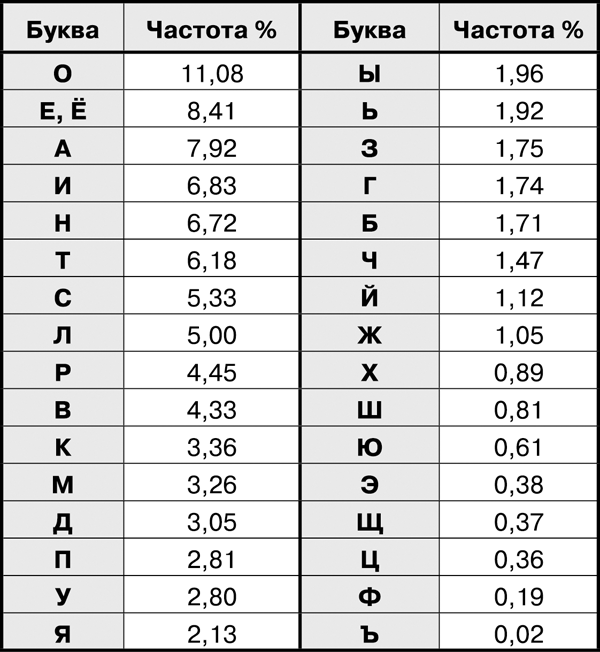

Зададим частоты для того, чтобы сгенерировать стартовую букву.

In [ ]:
freq = [0.0792, 0.0171, 0.0433, 0.0174,
        0.0305, 0.0700, 0.0140, 0.0105,
        0.0175, 0.0683, 0.0112, 0.0336,
        0.0500, 0.0326, 0.0672, 0.1108,
        0.0281, 0.0445, 0.0533, 0.0618,
        0.0280, 0.0019, 0.0089, 0.0036,
        0.0147, 0.0081, 0.0037, 0.0002,
        0.0196, 0.0192, 0.0038, 0.0061,
        0.0213]

In [ ]:
M = np.zeros((34, 34))
for i in range(34):
    for j in range(34):
        if df[df['XY'] == alph[i] + alph[j]]['count'].values:
            M[i][j] = df[df['XY'] == alph[i] + alph[j]]['count'].values[0]
        elif j == 33:
            M[i][j] = space_after_any

In [ ]:
for i in range(34):
    M[i] /= np.sum(M[i])

Сгенерируем несколько слов. Алгоритм следующий: выбираем стартовую букву из возможного набора с помощью `random.choice` с параметром `p`, равным частотам стартовых букв. Далее, пока очередная выбранная буква не равна пробела (но с пробела мы не стартуем, поэтому слово будет гарантированно состоять хотя бы из одной буквы), мы выбираем следующую буквы, исходя из матрицы M, в которой хранятся вероятности перехода (в каждой строке хранится вероятность перейти из буквы, отвечающей за эту строку в другую возможную букву), добавляем двухбуквенное сочетение в список, стартовая буква становится равной той, что была сгенерированна на текущем шаге.

In [ ]:
for i in range(20):
    start = np.random.choice(alph[:33], p = freq)
    word = [start]
    while start != ' ':
        s = np.random.choice(alph, p = M[alph.index(start)])
        word.append(s)
        start = s
    print(''.join(word))

етью 
туринтаворг 
молю 
овечк 
обльнытасятья 
есл 
довосмн 
блалу 
ларывурвлизытамичтова 
откаглопеботац 
меточннаротроравом 
рнаволькал 
еннетрольюдог 
ьковослоснер 
тостученицилия 
нака 
ствич 
уким 
овоемпр 
уданылк 


Проведем анализ на основе трех классических произведений русской литературы: "Мастер и Маргарита" Булгакова, "Мертвые души" Гоголя и "Обломов" Гончарова.

In [ ]:
d = {}
fr = {}

def add_to_freq(file1):
    while True:
        line = file1.readline()
        if not line:
            break
        for i in range(1, len(line)):
            s = str(line[i-1:i+1]).lower()
            if s[0] in alph[:33] and s[1] in alph:
              if s in d.keys():
                d[s] += 1
              else:
                d[s] = 1
            if s[0] not in alph[:33] and s[1] in alph[:33]:
              if s[1] in fr.keys():
                fr[s[1]] += 1
              else:
                fr[s[1]] = 1

add_to_freq(open("/content/мастер_и_маргарита.txt", "r"))
add_to_freq(open("/content/обломов.txt", "r"))
add_to_freq(open("/content/мертвые_души.txt", "r"))

In [ ]:
M2 = np.zeros((34, 34))
for i in range(34):
    for j in range(34):
        if alph[i] + alph[j] in d.keys():
            M2[i][j] =  d[alph[i] + alph[j]]

In [ ]:
for i in range(34):
    M2[i] /= np.sum(M2[i])

In [ ]:
import csv

with open('freq.csv', 'w') as f:
    w = csv.DictWriter(f, d.keys())
    w.writeheader()
    w.writerow(d)

with open('start.csv', 'w') as f:
    w = csv.DictWriter(f, fr.keys())
    w.writeheader()
    w.writerow(fr)

In [ ]:
freq = np.array(list(fr.values())) / sum(list(fr.values()))
starts = list(fr.keys())

Сгенерируем несколько слов.

In [ ]:
for i in range(20):
    start = np.random.choice(starts, p = freq)
    word = [start]
    while start != ' ':
        s = np.random.choice(alph, p = M2[alph.index(start)])
        word.append(s)
        start = s
    print(''.join(word))

босаненитвинетеем 
ниря 
лой 
м 
нымрь 
иссвил 
мумногою 
годак 
вшоталоствки 
солилий 
сльмоесомую 
акобыкок 
клолализа 
заку 
гунаячечтол 
атомнононилезвзаза 
умо 
омнитнитроегонуго 
во 
даня 


Попробуем генерировать предложения на основе указанных выше произведений.

In [10]:
import string

w = {}
s = {}
ww = []

def add_to_freq_w(file1):
    j = 0
    while True:
        line = file1.readline()
        if not line:
            break
        line = line.translate(str.maketrans('', '', string.punctuation))
        res = line.split()
        if len(res) > 0:
            ww.append(str(res[0]).lower())
        for i in range(1, len(res)):
            if str(res[i-1]).lower() + ' ' + str(res[i]).lower() in w.keys():
                w[str(res[i-1]).lower() + ' ' + str(res[i]).lower()] += 1
            else:
                w[str(res[i-1]).lower() + ' ' + str(res[i]).lower()] = 1
            ww.append(str(res[i]).lower())

            if str(res[i])[0].isupper():
                if str(res[i].lower()) in s.keys():
                    s[str(res[i]).lower()] += 1
                else:
                    s[str(res[i]).lower()] = 1

add_to_freq_w(open("/content/мастер_и_маргарита.txt", "r"))
add_to_freq_w(open("/content/обломов.txt", "r"))
add_to_freq_w(open("/content/мертвые_души.txt", "r"))


In [11]:
import numpy as np

freq = np.array(list(s.values())) / sum(list(s.values()))
starts = list(s.keys())

In [12]:
ww = list(set(ww))

In [17]:
start = np.random.choice(starts, p = freq)
word = []
for i in range(100):
    ss = []
    ff = []
    sss = []
    for www in ww:
        ss.append(start + ' ' + www)
    for s in ss:
        if s in w.keys():
            ff.append(w[s])
            sss.append(s)
    ff = np.array(ff) / sum(ff)
    s = np.random.choice(sss, p = ff).split(" ")[1:][0]
    word.append(s)
    start = s
print(' '.join(word), end = '\n')

донна на его недавно была почти над людьми да вот какието корешки очищает от тебя самого особняка в удовольствии или недоумение а как мелькнул пакет с простым объяснением и опустевший стакан нехорошо и глядел вдаль уже вышивает другой пересекавший первый идти вперед кричит в комнату нашел его телу начиная с мостом через обломовку постройка что она приедет в пушкине и пристальнее поглядел на будущий год он не слушать как его зов и занято лермонтовым и потом прикрикнул на прилавке и между фрачными мужчинами на каком положении он был в лето и подавно ели все равно что приняться ли что изпод


Ссылка на диск со всеми файлами https://drive.google.com/drive/folders/1Gkq5AvHcuq5roeW07ilgqgnhN9QQvusD?usp=sharing

### Задача 4

Пусть цепь Маркова имеет бесконечное число состояний. Обеспечим это функцией `T(x)`: каждый раз цепь переходит из состояния $x$ в $(x + 0.5) \mod \pi$, таким образом, она является апериодичной. В качестве функции возьмем $e^x$.

In [ ]:
from scipy.integrate import quad

def marcov_chain(N):
    Ff = []

    # переход в следующее состояние
    def T(x):
        return (x + 0.5) % np.pi

    # временное среднее значение
    # функции f
    def time_average(x, f, T, n):
        s = 0
        for k in range(n):
            Ff.append(f(x))
            s += f(x)
            x = T(x)
        return s/n

    # пространственное среднее значение 
    # функции f, вычисленное с помощью
    # численного интегрирования
    def space_average(f):
        integral = quad(f, 0, np.pi)[0]
        return integral / np.pi

    f = lambda x: np.exp(x)

    print(f'Для n = {N} временное среднее равно {time_average(0, f, T, N)}')
    print(f'Для n = {N} пространственное среднее равно {space_average(f)}')

    return Ff

In [ ]:
N1, N2, N3 = 100, 10000, 1000000
n1 = np.linspace(0, N1, N1, endpoint = True, dtype = int)
f1 = marcov_chain(N1)
n2 = np.linspace(0, N2, N2, endpoint = True, dtype = int)
f2 = marcov_chain(N2)
n3 = np.linspace(0, N3, N3, endpoint = True, dtype = int)
f3 = marcov_chain(N3)

Для n = 100 временное среднее равно 6.791902562785302
Для n = 100 пространственное среднее равно 7.047601351970261
Для n = 10000 временное среднее равно 7.031286982408032
Для n = 10000 пространственное среднее равно 7.047601351970261
Для n = 1000000 временное среднее равно 7.047169600238246
Для n = 1000000 пространственное среднее равно 7.047601351970261


Как видно, эргодическую теорема верна.

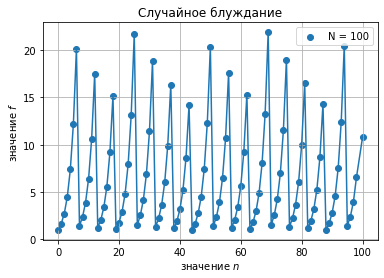

In [ ]:
plt.xlabel(rf'значение $n$')
plt.ylabel(rf'значение $f$')
plt.title(fr'Случайное блуждание')
plt.scatter(n1, f1, label = 'N = 100')
plt.plot(n1, f1)
plt.grid()
plt.legend()
plt.show()